In [32]:
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import stan
import arviz as az
import nest_asyncio
nest_asyncio.apply()

In [62]:
N = 100
alpha = -1.2
beta = 0.3
sigma = 2
x = np.random.normal(size=N)
y = alpha + beta * x + sigma * np.random.normal(size=N)

data = {
    'N' : N,
    'x' : x,
    'y' : y
}

In [63]:
program_code = """
data {
    int<lower=1> N;
    vector[N] x;
    vector[N] y;
}

parameters {
    real alpha;
    real beta;
    real<lower=0> sigma;
}

transformed parameters {
    real<lower=0> sigma2;
    sigma2 = sigma * sigma;

    array[N] real mean;
    for(t in 1:N){
        mean[t] = alpha + beta*x[t];
    }
}

model {
    sigma2 ~ inv_gamma(1, 1);
    alpha ~ normal(0, 10);
    beta ~ normal(0, 10);
    y ~ normal(mean, sigma);
}
"""

In [64]:
posterior = stan.build(program_code, data=data)

Building...



Building: 17.3s, done.

In [65]:
%%time
fit = posterior.sample(num_chains=4, num_samples=2000, num_warmup=1000)

Sampling:   0%
Sampling:  25% (3000/12000)
Sampling:  50% (6000/12000)
Sampling:  75% (9000/12000)
Sampling: 100% (12000/12000)
Sampling: 100% (12000/12000), done.
Messages received during sampling:
  Gradient evaluation took 1.5e-05 seconds
  1000 transitions using 10 leapfrog steps per transition would take 0.15 seconds.
  Adjust your expectations accordingly!
  Gradient evaluation took 1.3e-05 seconds
  1000 transitions using 10 leapfrog steps per transition would take 0.13 seconds.
  Adjust your expectations accordingly!
  Gradient evaluation took 1.7e-05 seconds
  1000 transitions using 10 leapfrog steps per transition would take 0.17 seconds.
  Adjust your expectations accordingly!
  Gradient evaluation took 1.2e-05 seconds
  1000 transitions using 10 leapfrog steps per transition would take 0.12 seconds.
  Adjust your expectations accordingly!


CPU times: user 766 ms, sys: 83 ms, total: 849 ms
Wall time: 1.08 s


In [66]:
df = fit.to_frame()
df.head()

parameters,lp__,accept_stat__,stepsize__,treedepth__,n_leapfrog__,divergent__,energy__,alpha,beta,sigma,...,mean.91,mean.92,mean.93,mean.94,mean.95,mean.96,mean.97,mean.98,mean.99,mean.100
draws,,,,,,,,,,,,,,,,,,,,,
0,-119.286762,1.000000,0.670458,3.0,7.0,0.0,119.783114,-1.392452,0.199662,1.773247,...,-1.350471,-1.514445,-1.600106,-1.341221,-1.440046,-1.426936,-1.597915,-1.463666,-1.250874,-1.201998
1,-119.315461,0.973688,0.878954,3.0,7.0,0.0,119.756467,-1.391419,0.026150,2.061565,...,-1.385921,-1.407397,-1.418616,-1.384709,-1.397653,-1.395936,-1.418330,-1.400747,-1.372877,-1.366475
2,-119.188482,0.922817,0.818098,2.0,3.0,0.0,121.133164,-1.395187,0.120520,2.068080,...,-1.369846,-1.468825,-1.520531,-1.364263,-1.423916,-1.416002,-1.519209,-1.438173,-1.309727,-1.280224
3,-119.488748,0.736361,0.853274,2.0,3.0,0.0,122.496826,-1.562026,0.318236,1.870649,...,-1.495113,-1.756468,-1.893000,-1.480370,-1.637885,-1.616989,-1.889509,-1.675532,-1.336369,-1.258465
4,-119.705518,0.977191,0.670458,3.0,7.0,0.0,120.204710,-1.450750,-0.081482,2.049459,...,-1.467882,-1.400965,-1.366007,-1.471657,-1.431327,-1.436677,-1.366901,-1.421687,-1.508527,-1.528474


In [67]:
summary = az.summary(fit)
summary

,mean,sd,hdi_3%,hdi_97%,mcse_mean,mcse_sd,ess_bulk,ess_tail,r_hat
alpha,-1.360,0.198,-1.745,-1.005,0.002,0.002,8493.0,5863.0,1.0
beta,0.178,0.220,-0.250,0.578,0.002,0.002,7844.0,6073.0,1.0
sigma,1.952,0.140,1.690,2.210,0.002,0.001,8333.0,6264.0,1.0
sigma2,3.829,0.555,2.855,4.882,0.006,0.004,8333.0,6264.0,1.0
mean[0],-1.384,0.199,-1.749,-1.013,0.002,0.002,8502.0,6125.0,1.0
...,...,...,...,...,...,...,...,...,...
mean[95],-1.391,0.200,-1.760,-1.017,0.002,0.002,8569.0,5981.0,1.0
mean[96],-1.544,0.295,-2.112,-1.001,0.003,0.002,8349.0,6522.0,1.0
mean[97],-1.424,0.210,-1.792,-1.010,0.002,0.002,8537.0,6161.0,1.0
mean[98],-1.234,0.257,-1.697,-0.739,0.003,0.002,7977.0,5782.0,1.0


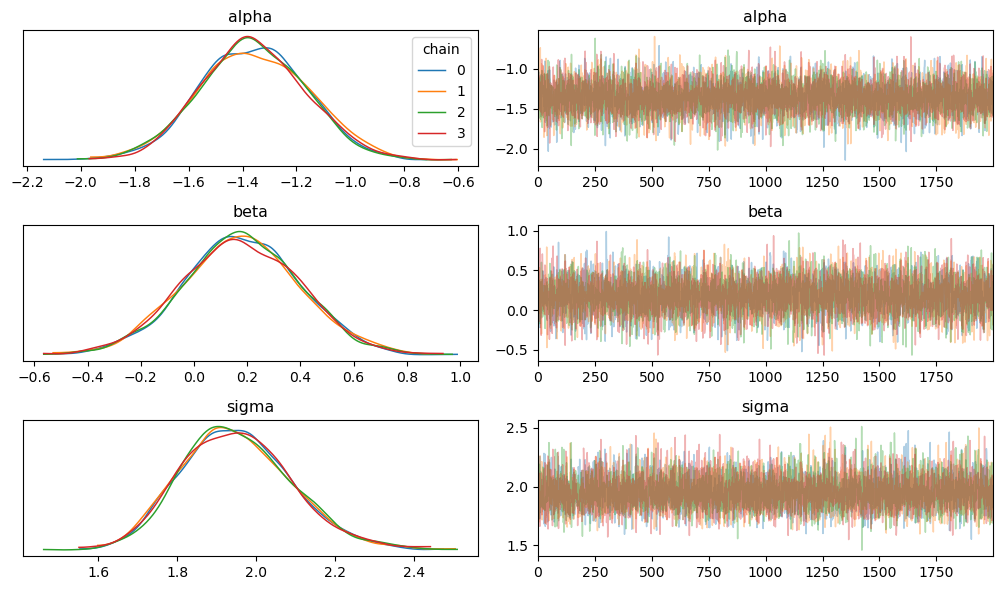

In [75]:
axarr = az.plot_trace(fit, var_names=['alpha', 'beta', 'sigma'], figsize=(10, 6), compact=False, legend=True)
plt.tight_layout()

In [68]:
N = 1000
alpha = -1.2
beta = 0.3
sigma = 2
x = np.random.normal(size=N)
y = alpha + beta * x + sigma * np.random.normal(size=N)

data2 = {
    'N' : N,
    'x' : x,
    'y' : y
}

In [69]:
posterior2 = stan.build(program_code, data=data2)

Building...



Building: found in cache, done.

In [70]:
%%time
fit2 = posterior2.sample(num_chains=4, num_samples=2000, num_warmup=1000)

Sampling:   0%
Sampling:  25% (3000/12000)
Sampling:  50% (6000/12000)
Sampling:  75% (9000/12000)
Sampling: 100% (12000/12000)
Sampling: 100% (12000/12000), done.
Messages received during sampling:
  Gradient evaluation took 5.7e-05 seconds
  1000 transitions using 10 leapfrog steps per transition would take 0.57 seconds.
  Adjust your expectations accordingly!
  Gradient evaluation took 5.7e-05 seconds
  1000 transitions using 10 leapfrog steps per transition would take 0.57 seconds.
  Adjust your expectations accordingly!
  Informational Message: The current Metropolis proposal is about to be rejected because of the following issue:
  Exception: normal_lpdf: Scale parameter is 0, but must be positive! (in '/tmp/httpstan_uy0ztki4/model_tx22cl6r.stan', line 28, column 4 to column 28)
  If this warning occurs sporadically, such as for highly constrained variable types like covariance matrices, then the sampler is fine,
  but if this warning occurs often then your model may be either se

CPU times: user 5.24 s, sys: 675 ms, total: 5.91 s
Wall time: 6.3 s


In [71]:
df = fit2.to_frame()
df.head()

parameters,lp__,accept_stat__,stepsize__,treedepth__,n_leapfrog__,divergent__,energy__,alpha,beta,sigma,...,mean.991,mean.992,mean.993,mean.994,mean.995,mean.996,mean.997,mean.998,mean.999,mean.1000
draws,,,,,,,,,,,,,,,,,,,,,
0,-1166.944020,0.991449,0.855785,2.0,3.0,0.0,1168.813933,-1.172300,0.421141,1.955689,...,-1.154841,-1.211361,-1.156473,-1.344701,-1.034851,-1.403951,-0.873052,-1.016674,-1.005729,-1.436357
1,-1167.301776,0.959901,0.809523,3.0,7.0,0.0,1169.158667,-1.260616,0.418213,1.905286,...,-1.243278,-1.299406,-1.244899,-1.431819,-1.124122,-1.490657,-0.963448,-1.106072,-1.095203,-1.522837
2,-1167.042137,0.971364,0.779283,2.0,7.0,0.0,1167.246086,-1.188866,0.416255,1.905666,...,-1.171609,-1.227474,-1.173223,-1.359266,-1.053011,-1.417829,-0.893090,-1.035045,-1.024228,-1.449859
3,-1166.926420,0.966555,0.746195,3.0,7.0,0.0,1168.213648,-1.263164,0.359583,1.921333,...,-1.248257,-1.296516,-1.249651,-1.410365,-1.145805,-1.460955,-1.007656,-1.130285,-1.120941,-1.488624
4,-1166.570313,0.926897,0.855785,1.0,3.0,0.0,1167.744827,-1.231042,0.356255,1.944919,...,-1.216273,-1.264085,-1.217654,-1.376881,-1.114770,-1.427002,-0.977900,-1.099394,-1.090135,-1.454415


In [72]:
summary = az.summary(fit2)
summary

,mean,sd,hdi_3%,hdi_97%,mcse_mean,mcse_sd,ess_bulk,ess_tail,r_hat
alpha,-1.215,0.062,-1.330,-1.098,0.001,0.001,7695.0,5961.0,1.0
beta,0.380,0.061,0.269,0.499,0.001,0.001,7330.0,5241.0,1.0
sigma,1.943,0.044,1.858,2.025,0.001,0.000,7693.0,5477.0,1.0
sigma2,3.778,0.172,3.452,4.101,0.002,0.001,7693.0,5477.0,1.0
mean[0],-0.999,0.073,-1.131,-0.860,0.001,0.001,7441.0,5891.0,1.0
...,...,...,...,...,...,...,...,...,...
mean[995],-1.424,0.069,-1.556,-1.298,0.001,0.001,7849.0,5977.0,1.0
mean[996],-0.945,0.078,-1.084,-0.795,0.001,0.001,7410.0,5779.0,1.0
mean[997],-1.075,0.067,-1.201,-0.952,0.001,0.001,7503.0,5736.0,1.0
mean[998],-1.065,0.068,-1.192,-0.940,0.001,0.001,7494.0,5802.0,1.0


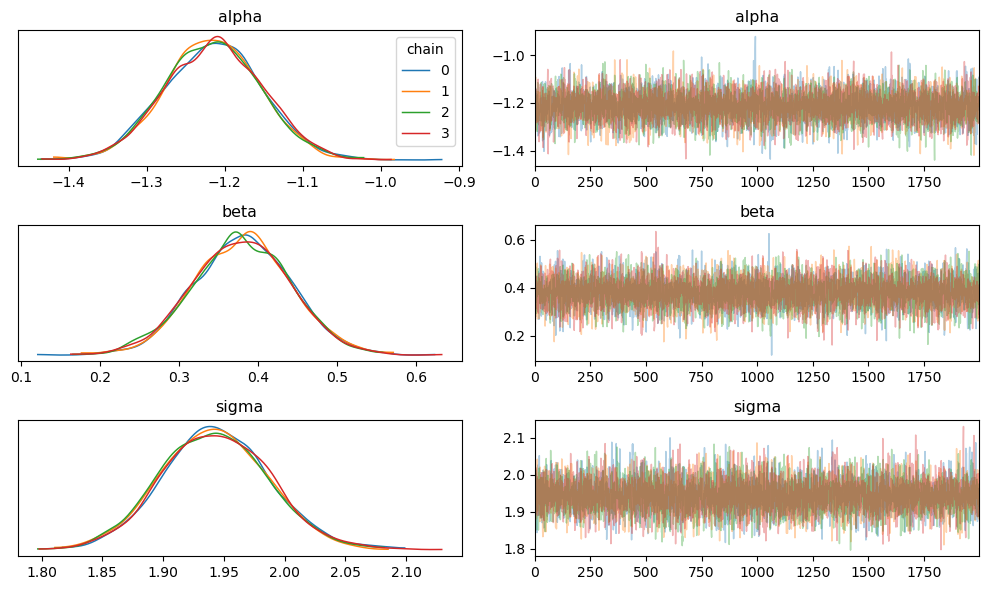

In [74]:
axarr = az.plot_trace(fit2, var_names=['alpha', 'beta', 'sigma'], figsize=(10, 6), compact=False, legend=True)
plt.tight_layout()